In [5]:
import cv2

In [6]:
import matplotlib.pyplot as plt

In [7]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [8]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)


In [9]:
classLabels = [] # empty list
file_name = 'coco.names'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    # classLabels.append(fpt.read())
    

In [10]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [11]:
len(classLabels)

80

In [12]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) 
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001C820730CD0>

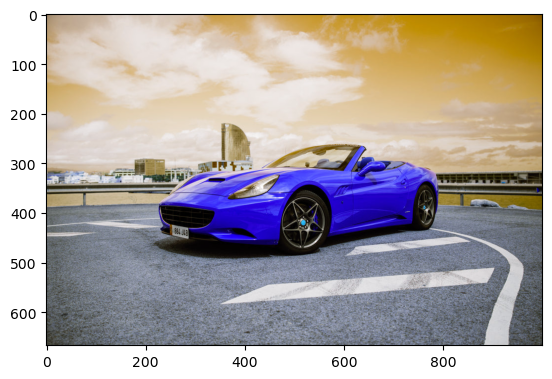

In [22]:
#read image
img = cv2.imread('car.jpg') 
plt.imshow(img) # it gives bgr

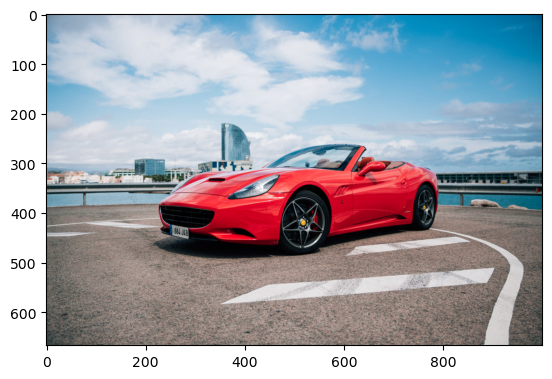

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) # converts to rgb(Original)

In [15]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [16]:
print(ClassIndex) # 5 must be the ouput accordg to 'labels 5' is aeroplane

[3]


In [17]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassIndex,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassIndex-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

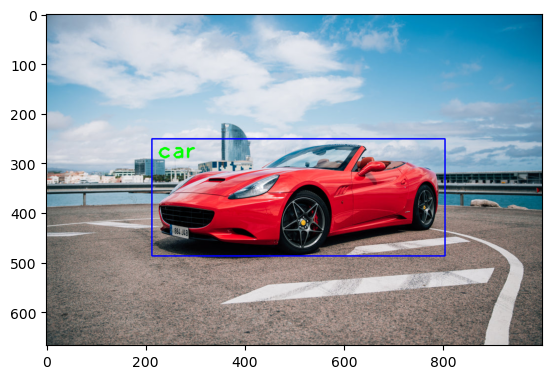

In [18]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [28]:
cap = cv2.VideoCapture('skatting.MP4')

# Check if the video is opened properly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)  # Use webcam if video file cannot be opened
if not cap.isOpened():
    raise IOError('Cannot open video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

# Get the initial size of the video frame
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    ret, frame = cap.read()
    if not ret:
        break 
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    if len(ClassIndex) != 0:
        for ClassInd, conf, box in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, box, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (box[0]+10, box[1]+40), font, fontScale=font_scale, color=(0, 255, 0))

    # Display the frame in a window
    cv2.namedWindow('Object Detection', cv2.WINDOW_NORMAL)  # Allow window resizing
    cv2.resizeWindow('Object Detection', frame_width, frame_height)  # Set window size
    cv2.imshow('Object Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()
